# msvmpy

Multiclass SVMs in python

## Offerings

`hard_margin.py` - hard margin multiclass SVM solved using the QP solver `CVXOPT`

In [39]:
!pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/yutongw/projects/msvmpy
  Preparing metadata (setup.py) ... done
  Running setup.py develop for msvmpy


## Example with three classes

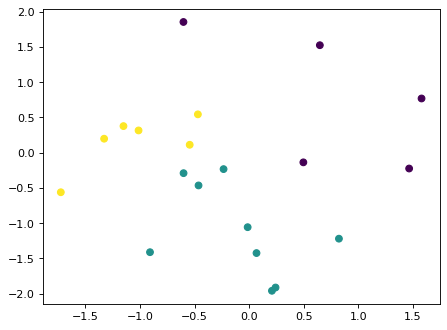

In [40]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 80

def make_dataset(num_samples, num_classes, num_features, random_seed = None):
    if random_seed is not None:
        np.random.seed(random_seed)
    X = np.random.randn(num_samples,num_features)
    Wstar = np.random.randn(num_features,num_classes)      # ground truth classifier
    y = np.argmax(X@Wstar,axis=1)     # labels
    return X, y

num_samples = 20
num_classes = 3
num_features = 2
X,y = make_dataset(num_samples,num_classes,num_features,42)
plt.scatter(X[:,0],X[:,1],c = y)

## One MSVM, two parametrization

We have the class score-based parametrization and the relative margin-based parametrization

In [41]:
import msvmpy.hard_margin as hard_margin
import time

start_time = time.time()
Wscore,_ = hard_margin.FnormA_du_score(X,y,num_classes)
end_time = time.time()
execution_time = end_time - start_time
print("class-score: ", execution_time)

start_time = time.time()
Wrmarg,dual_vars = hard_margin.FnormA_du_rmarg(X,y,num_classes)
end_time = time.time()
execution_time = end_time - start_time
print("relative margin: ", execution_time)

     pcost       dcost       gap    pres   dres
 0: -1.1536e+01 -2.6738e+01  1e+02  9e+00  2e+00
 1: -2.9245e+01 -3.3554e+01  5e+01  4e+00  1e+00
 2: -1.1632e+02 -1.1295e+02  6e+01  4e+00  9e-01
 3: -2.0798e+02 -1.9863e+02  9e+01  3e+00  8e-01
 4: -1.6837e+02 -1.8771e+02  2e+02  2e+00  5e-01
 5: -1.4671e+02 -1.5158e+02  4e+01  4e-01  9e-02
 6: -1.3272e+02 -1.3287e+02  4e-01  3e-03  7e-04
 7: -1.3266e+02 -1.3266e+02  4e-03  3e-05  7e-06
 8: -1.3265e+02 -1.3265e+02  4e-05  3e-07  7e-08
 9: -1.3265e+02 -1.3265e+02  4e-07  3e-09  7e-10
Optimal solution found.
class-score:  0.00394439697265625
     pcost       dcost       gap    pres   dres
 0: -1.1536e+01 -2.6738e+01  1e+02  9e+00  2e+00
 1: -2.9245e+01 -3.3554e+01  5e+01  4e+00  1e+00
 2: -1.1632e+02 -1.1295e+02  6e+01  4e+00  9e-01
 3: -2.0798e+02 -1.9863e+02  9e+01  3e+00  8e-01
 4: -1.6837e+02 -1.8771e+02  2e+02  2e+00  5e-01
 5: -1.4671e+02 -1.5158e+02  4e+01  4e-01  9e-02
 6: -1.3272e+02 -1.3287e+02  4e-01  3e-03  7e-04
 7: -1.3266e+

## Verify that the solutions are the same

In [42]:
np.linalg.norm(Wscore - Wrmarg)

3.254349845741358e-13

In [43]:
def plot_line(w,b=0,**kwargs):
    # plot the set of points v = [x,y] in R^2 such that
    # w@v = b
    # w[0]*x + w[1]*y= b
    # y = x*(-w[0]/w[1])+b/w[1]
    ax = plt.gca()
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    xs = np.linspace(xlims[0],xlims[1])
    ys = -xs*(w[0]/w[1])+b/w[1]
    ax.plot(xs,ys,**kwargs)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    return None

def plot_bdry(w):
    plot_line(w[:,0] - w[:,1], linestyle=':', c= 'k')
    plot_line(w[:,0] - w[:,2], linestyle=':', c= 'k')
    plot_line(w[:,1] - w[:,2], linestyle=':', c= 'k')
    return None

### Plot the dual variables

/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


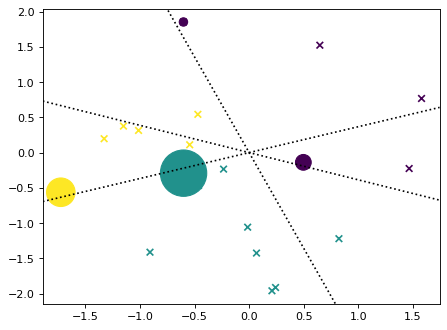

In [44]:
plt.scatter(X[:,0],X[:,1],c = y,marker='x')
plt.scatter(X[:,0],X[:,1],c = y, s = 10*np.sum(dual_vars,axis=1))
plot_bdry(Wrmarg)

## Example with two classes

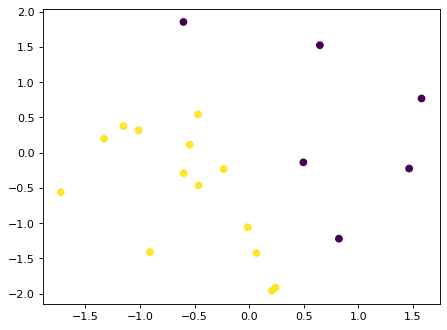

In [45]:

num_samples = 20
num_classes = 2
num_features = 2
X,y = make_dataset(num_samples,num_classes,num_features,42)
plt.scatter(X[:,0],X[:,1],c = y)

In [46]:
import msvmpy.hard_margin as hard_margin
import time

start_time = time.time()
Wscore,_ = hard_margin.FnormA_du_score(X,y,num_classes)
end_time = time.time()
execution_time = end_time - start_time
print("class-score: ", execution_time)

start_time = time.time()
Wrmarg,dual_vars = hard_margin.FnormA_du_rmarg(X,y,num_classes)
end_time = time.time()
execution_time = end_time - start_time
print("relative margin: ", execution_time)

     pcost       dcost       gap    pres   dres
 0: -5.5638e+00 -1.1327e+01  6e+01  7e+00  2e+00
 1: -9.2824e+00 -9.2049e+00  2e+01  2e+00  6e-01
 2: -8.4674e+00 -6.4218e+00  4e+00  5e-01  1e-01
 3: -5.7291e+00 -5.8748e+00  1e-01  1e-15  4e-15
 4: -5.8318e+00 -5.8333e+00  1e-03  4e-15  2e-15
 5: -5.8329e+00 -5.8329e+00  1e-05  9e-16  2e-15
 6: -5.8329e+00 -5.8329e+00  1e-07  3e-21  2e-15
Optimal solution found.
class-score:  0.003186941146850586
     pcost       dcost       gap    pres   dres
 0: -5.5638e+00 -1.1327e+01  6e+01  7e+00  2e+00
 1: -9.2824e+00 -9.2049e+00  2e+01  2e+00  6e-01
 2: -8.4674e+00 -6.4218e+00  4e+00  5e-01  1e-01
 3: -5.7291e+00 -5.8748e+00  1e-01  2e-15  4e-15
 4: -5.8318e+00 -5.8333e+00  1e-03  2e-15  3e-15
 5: -5.8329e+00 -5.8329e+00  1e-05  2e-15  3e-15
 6: -5.8329e+00 -5.8329e+00  1e-07  2e-15  3e-15
Optimal solution found.
relative margin:  0.002132892608642578


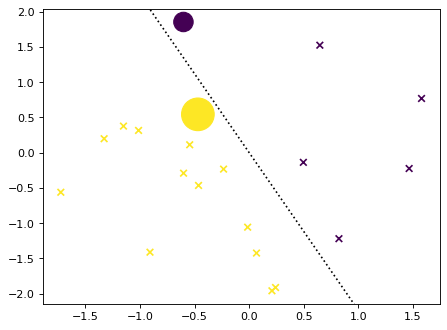

In [47]:
plt.scatter(X[:,0],X[:,1],c = y,marker='x')
plt.scatter(X[:,0],X[:,1],c = y, s = 100*np.sum(dual_vars,axis=1))
plot_line(Wrmarg[:,1],linestyle=":", c='k')